In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('/content/drive/MyDrive/spam.csv')
df.head()
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.isnull().sum()

,0
Category,0
Message,0


In [5]:
df['Category'].value_counts()

,count
Category,
ham,4825
spam,747


In [6]:
df1=df.copy()

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
df['Category'].value_counts()

,count
Category,
ham,4516
spam,641


In [10]:
from sklearn.preprocessing import LabelEncoder


In [11]:
le = LabelEncoder()


In [12]:
df['Category']=le.fit_transform(df['Category'])
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
x=df['Message']
y=df['Category']
# x=df.drop('Category',axis=1)
# y=df['Category']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [16]:
x_train.shape

(4125,)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
v=CountVectorizer()

In [19]:
x_train= v.fit_transform(x_train)
x_train.toarray()
x_test= v.transform(x_test)


In [20]:
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [21]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [22]:
nb.fit(x_train,y_train)

MultinomialNB()

In [23]:
y_pred=nb.predict(x_test)

In [24]:
nb.score(x_test,y_test)

0.9815891472868217

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
y_pred = nb.predict(x_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       909
           1       0.96      0.88      0.92       123

    accuracy                           0.98      1032
   macro avg       0.97      0.94      0.95      1032
weighted avg       0.98      0.98      0.98      1032



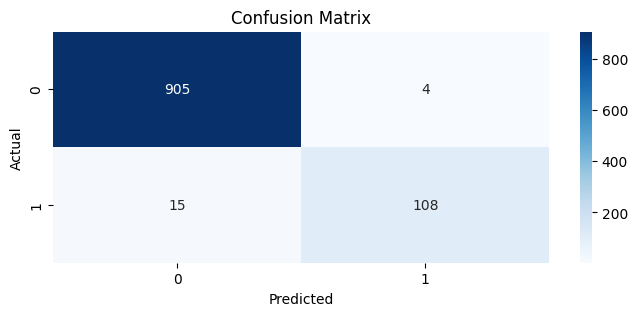

In [27]:
# Plot confusion matrix
plt.figure(figsize=(8, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:
emails=['Congratulations! You have won a $1,000 gift card. Click here to claim your prize now: http://fakeprize.com','Hey John, are we still meeting at 5 PM for the project discussion? Let me know if anything changes.']

In [29]:
nb.predict(v.transform(emails))
nb.predict(v.transform(emails))

array([1, 0])